In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv('wine.csv')
data

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
x = data.iloc[:,1:14]
y = data.iloc[:,0]
print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [32]:
pca = PCA(n_components=6)
pc = pca.fit_transform(x_scaled)
print(pc)

[[ 3.31675081 -1.44346263 -0.16573904 -0.21563119  0.69304284 -0.22388013]
 [ 2.20946492  0.33339289 -2.02645737 -0.29135832 -0.25765463 -0.92712024]
 [ 2.51674015 -1.0311513   0.98281867  0.72490231 -0.25103312  0.54927605]
 ...
 [-2.67783946 -2.76089913 -0.94094188  0.31203475  1.271355    0.27306792]
 [-2.38701709 -2.29734668 -0.5506962  -0.68828455  0.81395522  1.17878298]
 [-3.20875816 -2.76891957  1.01391366  0.59690319 -0.89519259  0.29609218]]


In [33]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]
0.8509811607477044


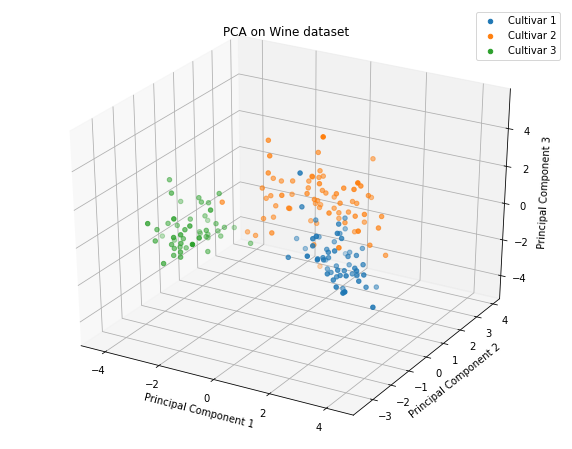

In [39]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

for ele in np.unique(y):
    pc_by_ele = pc[y == ele]
    ax.scatter3D(xs = pc_by_ele[:,0],
                 ys = pc_by_ele[:,1],
                 zs = pc_by_ele[:,2],
                 label = 'Cultivar ' + str(ele))

plt.title('PCA on Wine dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.legend()
plt.show()